In [1]:
# Load in libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import dataset
US = pd.read_csv("USVideos.csv")

## 1. General Overview of Dataset

In [3]:
US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
length = len(US)
print(f'Number of observations: {length}')

Number of observations: 40949


In [6]:
num_videos = US['video_id'].nunique()
print(f'There are {num_videos} different videos in the dataset')

There are 6351 different videos in the dataset


In [7]:
no_likes = len(US[US['likes'] == 0])
print(f"Interestingly, there are {no_likes} videos without any likes")

Interestingly, there are 172 videos without any likes


In [8]:
least_views = US['views'].min()
print(f"The least-viewed video in the dataset only had {least_views} views")

The least-viewed video in the dataset only had 549 views


Text(0, 0.5, '')

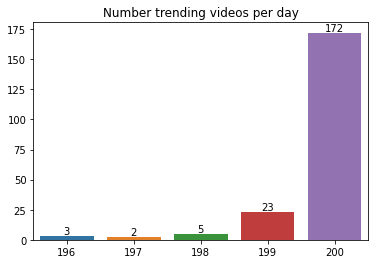

In [9]:
# Almost always 200 trending videos per day, but sometimes a few less - why?
fig, ax = plt.subplots()
count = US.groupby('trending_date').size()
ax = sns.countplot(x = count)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number trending videos per day')
plt.ylabel(None)

## 2. Missing Values

In [10]:
# description has 570 missing values
US.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [11]:
no_description = US[US['description'].isnull()]['title'].nunique()
print(f"There are {no_description} different videos in the dataset without a description")

There are 105 different videos in the dataset without a description


In [12]:
# most frequently recurring videos without descriptions
US[US['description'].isnull()]['title'].value_counts().head(5)

Getting some air, Atlas?               28
True Facts : Ant Mutualism             25
kanye west / charlamagne interview     23
Pouring water down a 50 meter well.    15
Stephen Fry Announcement               13
Name: title, dtype: int64

In [13]:
# videos without tags say [none] - doesn't register as a null value - will have to account for that
US[US['tags'] == '[none]'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
97,xfmipNU4Odc,17.14.11,Edna's registered owner thought she was dead f...,Hope For Paws - Official Rescue Channel,15,2017-11-10T18:02:04.000Z,[none],284666,16396,81,949,https://i.ytimg.com/vi/xfmipNU4Odc/default.jpg,False,False,False,Please donate $5 and help us save more lives:\...
133,X7flefV8tec,17.14.11,"President Bill Clinton On Dictators, Democracy...",Team Coco,24,2017-11-09T02:37:49.000Z,[none],366180,4364,4448,1997,https://i.ytimg.com/vi/X7flefV8tec/default.jpg,False,False,False,#ConanNYC Highlight: President Clinton talks a...
136,5x1FAiIq_pQ,17.14.11,Alicia Keys - When You Were Gone,Alicia Keys,10,2017-11-09T15:49:21.000Z,[none],95944,1354,181,117,https://i.ytimg.com/vi/5x1FAiIq_pQ/default.jpg,False,False,False,Find out more in The Vault: http://bit.ly/AK_A...
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


In [14]:
no_tags = len(US[US['tags'] == '[none]'])
print(f"There are {no_tags} videos without tags")

There are 1535 videos without tags


In [15]:
# most frequently reccurring videos without tags
US[US['tags'] == '[none]']['title'].value_counts().head(5)

True Facts : Ant Mutualism                             25
Primitive Technology: Round hut                        18
Jurassic World: Fallen Kingdom - Final Trailer [HD]    18
Thanos has a great plan                                17
I have a brain tumor.                                  16
Name: title, dtype: int64

In [16]:
# 3 deleted videos in the dataset -- all have same video id, but two separate videos
US[US['title'] == 'Deleted video']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
15499,kZete48ZtsY,18.01.02,Deleted video,Midnight Video,1,2018-01-29T13:00:00.000Z,"horror|""horror short""|""short""|""short film""|""my...",60262,4804,122,736,https://i.ytimg.com/vi/-V1Oo7srGf0/default.jpg,False,False,True,After dusting off an old Mystery Date-style bo...
15755,kZete48ZtsY,18.02.02,Deleted video,DaHoopSpot Productions,17,2017-12-16T04:29:25.000Z,[none],2611,8,12,5,https://i.ytimg.com/vi/NzCSJrxQyQI/default.jpg,False,False,True,NaN
15980,kZete48ZtsY,18.03.02,Deleted video,DaHoopSpot Productions,17,2017-12-16T04:29:25.000Z,[none],2620,8,12,5,https://i.ytimg.com/vi/NzCSJrxQyQI/default.jpg,False,False,True,NaN


## 3. Video Categories

In [17]:
# Replace category id with actual category, using this link: https://gist.github.com/dgp/1b24bf2961521bd75d6c
# Interesting that a lot of categories, such as trailers don't show up in the data - were they filtered out?
US['category_id'].replace(to_replace = {22:'People & Blogs', 24:'Entertainment', 23: 'Comedy', 
                                        28: 'Science & Technology', 1: 'Film & Animation',
                                        25: 'News & Politics', 17: 'Sports', 10: 'Music',
                                        15: 'Pets & Animals', 27: 'Education', 26: 'Howto & Style',
                                        2: 'Autos & Vehicles', 19: 'Travel & Events', 20: 'Gaming',
                                        29: 'Nonprofits & Activism', 43: 'Shows'}, inplace = True)

In [18]:
# Rename category_id to category
US.rename(columns = {'category_id': 'category'}, inplace = True)
US.head()

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [19]:
most_viewed = US['category'].value_counts()[:5]
print(f"Top five most-viewed categories: \n{most_viewed}")

Top five most-viewed categories: 
Entertainment     9964
Music             6472
Howto & Style     4146
Comedy            3457
People & Blogs    3210
Name: category, dtype: int64


[Text(0.5, 0, ''), Text(0, 0.5, '')]

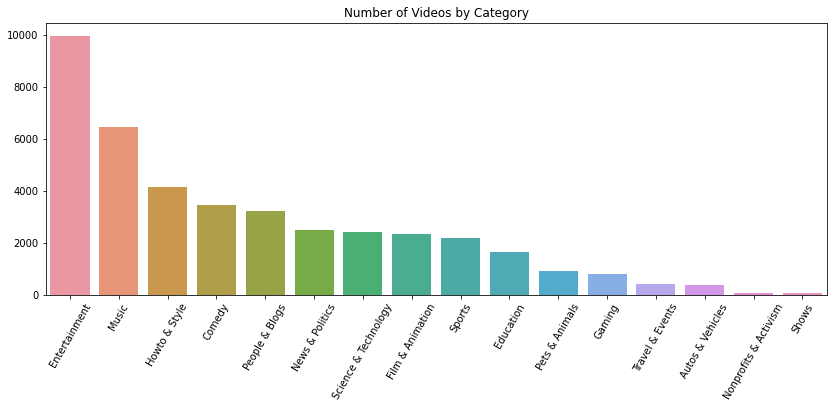

In [20]:
plt.figure(figsize = (14,5))
plt.title('Number of Videos by Category')
plt.xticks(rotation=60)
g = sns.countplot(x = 'category', data = US, order = US['category'].value_counts().index)
g.set(xlabel=None, ylabel = None)

[Text(0.5, 0, ''), Text(0, 0.5, 'Log Transformed Views')]

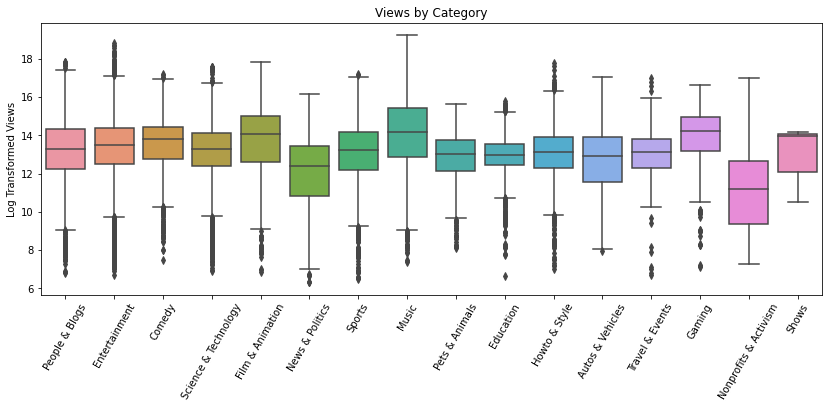

In [21]:
# Log transformed to better see the distribution
# Views seems to be most widely distributed in Music, Entertainment, and Sports
US['log_views'] = np.log(US['views'])
plt.figure(figsize = (14,5))
plt.title('Views by Category')
plt.xticks(rotation=60)
g1 = sns.boxplot(x = 'category', y = 'log_views', data = US)
g1.set(xlabel=None, ylabel = 'Log Transformed Views')

/Users/danielielusic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[Text(0.5, 0, ''), Text(0, 0.5, 'Log Transformed Likes')]

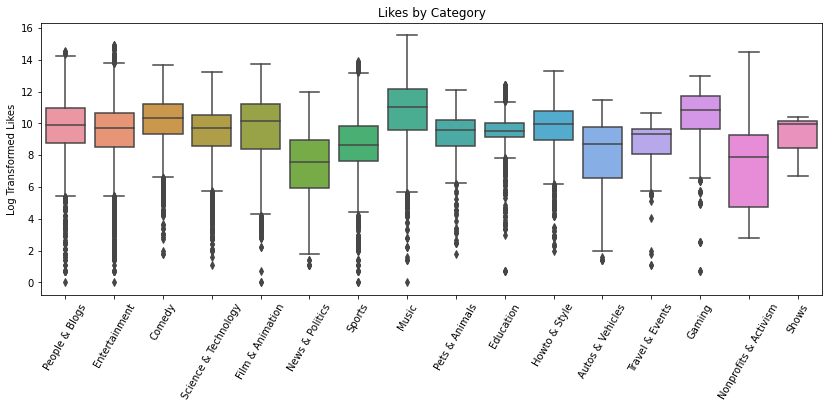

In [22]:
US['log_likes'] = np.log(US['likes'])
plt.figure(figsize = (14,5))
plt.title('Likes by Category')
plt.xticks(rotation=60)
g1 = sns.boxplot(x = 'category', y = 'log_likes', data = US)
g1.set(xlabel=None, ylabel = 'Log Transformed Likes')
# Music, People & Blogs, Entertainment, Nonprofits highly spread out, Shows not

In [23]:
US[US['views'] == US['views'].max()]['title']

38547    Childish Gambino - This Is America (Official V...
Name: title, dtype: object

[Text(0.5, 0, ''), Text(0, 0.5, 'Log Transformed Dislikes')]

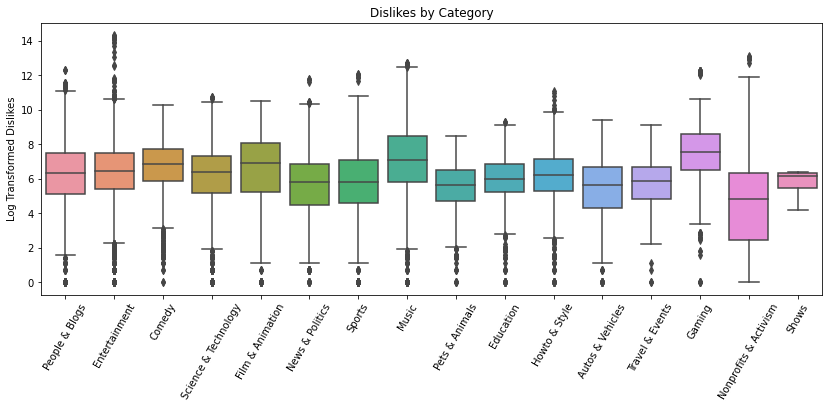

In [24]:
US['log_dislikes'] = np.log(US['dislikes'] + 1)
plt.figure(figsize = (14,5))
plt.title('Dislikes by Category')
plt.xticks(rotation=60)
g1 = sns.boxplot(x = 'category', y = 'log_dislikes', data = US)
g1.set(xlabel=None, ylabel = 'Log Transformed Dislikes')
# Similar trend as in likes

## 4. Like Rate, Dislike Rate, Comment Rate

In [25]:
US['like_rate'] = US['likes'] / US['views']
US['dislike_rate'] = US['dislikes'] / US['views']
US['comment_rate'] = US['comment_count'] / US['views']

<AxesSubplot:xlabel='like_rate', ylabel='Count'>

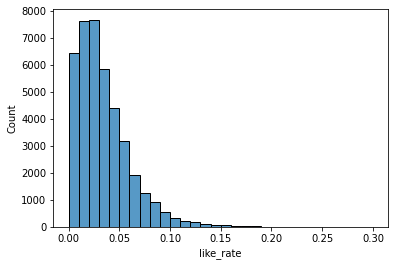

In [26]:
# distribution of like rate, dislike rate, and comment rate -- all have a pretty strong right skew
sns.histplot(data = US, x = 'like_rate', binwidth = 0.01)

<AxesSubplot:xlabel='dislike_rate', ylabel='Count'>

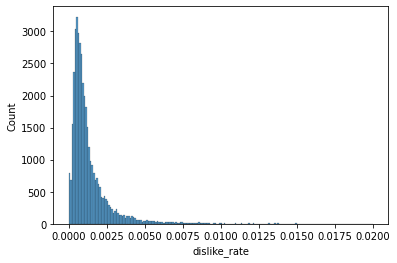

In [27]:
sns.histplot(data = US, x = 'dislike_rate', binwidth = 0.0001, binrange = (0, 0.02))

<AxesSubplot:xlabel='comment_rate', ylabel='Count'>

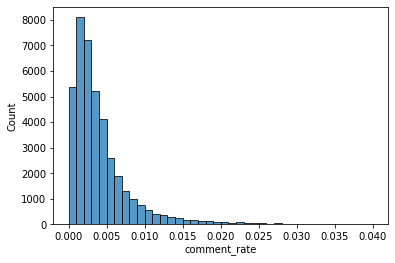

In [28]:
sns.histplot(data = US, x = 'comment_rate', binwidth = 0.001, binrange = (0,0.04))

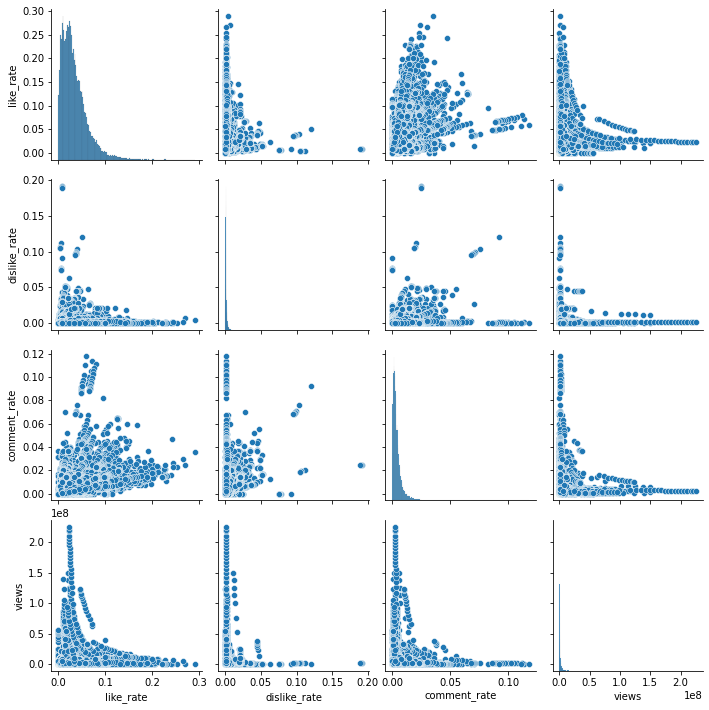

In [29]:
# Like rate, dislike rate, and comment rate are all very low for videos with high view counts (see last column)
sns.pairplot(US[['like_rate','dislike_rate', 'comment_rate','views']])

<AxesSubplot:>

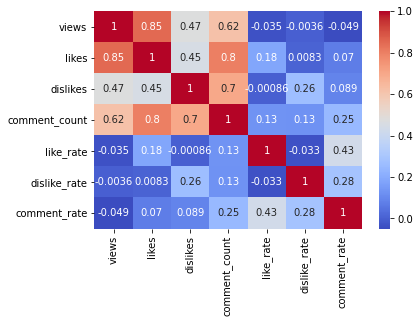

In [30]:
# correlation matrix
# correlation values are for rates because not a linear relationship with views (see pairplot)
# still have a clear relationship, though - find some way to work with them? eg: can tell from low rates that
# the video most likely has a lot of views
corrmat = US[['views', 'likes', 'dislikes', 'comment_count', 'like_rate', 'dislike_rate', 'comment_rate']]
sns.heatmap(corrmat.corr(), cmap = 'coolwarm', annot = True)

## 5. Miscellaneous Variables

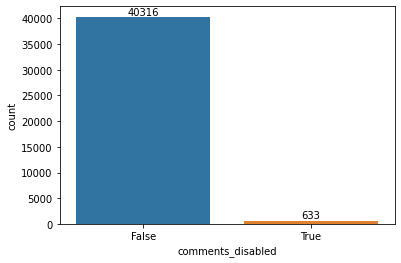

In [31]:
fig, ax = plt.subplots()
ax = sns.countplot(data = US, x = 'comments_disabled')
for container in ax.containers:
    ax.bar_label(container)

In [32]:
no_comments = US[US['comments_disabled'] == True]['title'].nunique()
print(f"There are {no_comments} videos with comments disabled")

There are 112 videos with comments disabled


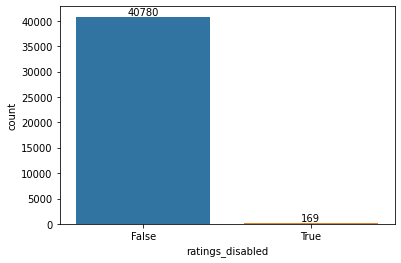

In [33]:
fig, ax = plt.subplots()
ax = sns.countplot(data = US, x = 'ratings_disabled')
for container in ax.containers:
    ax.bar_label(container)

In [34]:
no_ratings = US[US['ratings_disabled'] == True]['title'].nunique()
print(f"There are {no_ratings} videos with ratings disabled")

There are 36 videos with ratings disabled


False    40926
True        23
Name: video_error_or_removed, dtype: int64

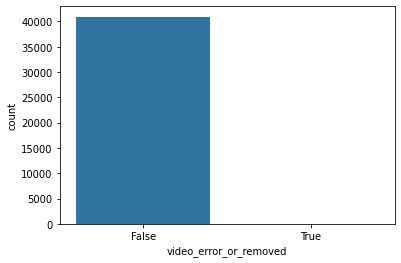

In [35]:
sns.countplot(data = US, x = 'video_error_or_removed')
US['video_error_or_removed'].value_counts()

## 6. Further Areas of Exploration
- trending_date and publish_time - may want to change data into a more workable format
 - analyze trends over time, as well as most common time of day to publish videos

## 7. Potential Machine Learning Topics
1. Regression model to predict views
2. Sentiment analysis - categorize videos as positive or negative based on title, description, and tags, and observe how that affects viewership
 1. Look into natural language processing
3. Clustering - explore which types of videos are most similar to each other